In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка датасетов
dataset_electrical_load  = pd.read_csv('AEP_hourly.csv')
dataset_air_temperature = pd.read_csv('texas_temp.csv')

In [3]:
# Вывод информации о датасетах
print("dataset_electrical_load 1 info:")
print(dataset_electrical_load.info())
print("dataset_air_temperature 2 info:")
print(dataset_air_temperature.info())

dataset_electrical_load 1 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None
dataset_air_temperature 2 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4482 entries, 0 to 4481
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4482 non-null   int64  
 1   DATE        4482 non-null   object 
 2   DEWP        4482 non-null   float64
 3   TEMP        4482 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.2+ KB
None


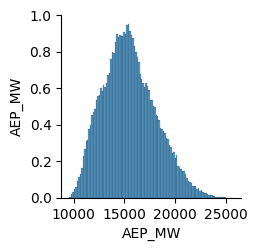

In [5]:
# Исследовательский анализ данных (EDA)
# Построение графиков для датасета 1 (гистограммы, ящики с усами, корреляционные матрицы и т.д.)
sns.pairplot(dataset_electrical_load)
plt.show()

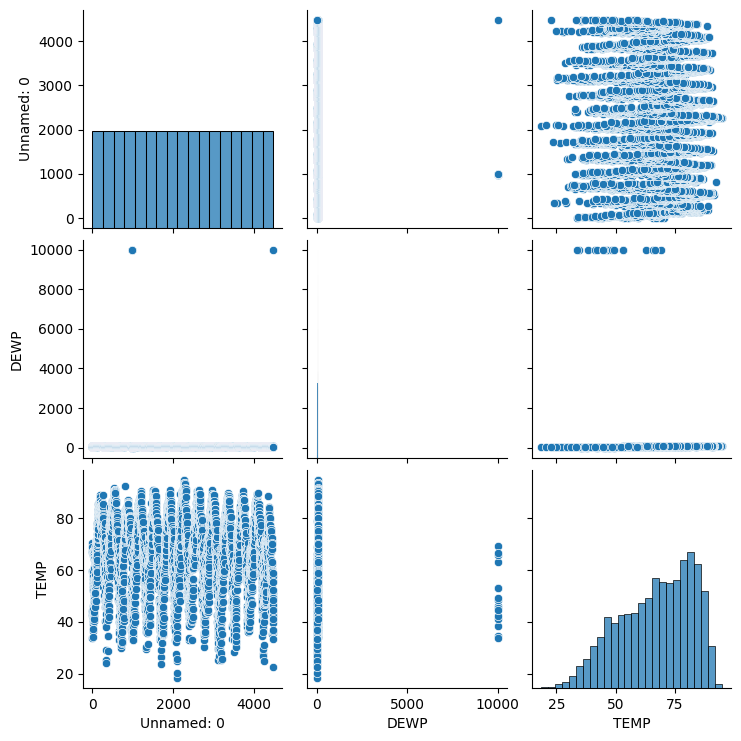

In [6]:
# Аналогично для датасета 2
sns.pairplot(dataset_air_temperature)
plt.show()

In [7]:
# 1. Подготовка данных
# Преобразование столбцов Datetime и DATE в тип datetime
dataset_electrical_load['Datetime'] = pd.to_datetime(dataset_electrical_load['Datetime'])
dataset_air_temperature['DATE'] = pd.to_datetime(dataset_air_temperature['DATE'])

In [8]:
# Удаление столбца 'Unnamed: 0', если он дублирует индекс
dataset_air_temperature = dataset_air_temperature.drop(columns=['Unnamed: 0'])

In [9]:
# Обработка пропущенных значений и дубликатов
dataset_electrical_load = dataset_electrical_load.dropna().drop_duplicates()
dataset_air_temperature = dataset_air_temperature.dropna().drop_duplicates()

In [10]:
# 2. Описательная статистика
print("Dataset 1 (Electrical Load) descriptive statistics:")
print(dataset_electrical_load['AEP_MW'].describe())

Dataset 1 (Electrical Load) descriptive statistics:
count    121273.000000
mean      15499.513717
std        2591.399065
min        9581.000000
25%       13630.000000
50%       15310.000000
75%       17200.000000
max       25695.000000
Name: AEP_MW, dtype: float64


In [11]:
print("\nDataset 2 (Air Temperature) descriptive statistics:")
print(dataset_air_temperature[['DEWP', 'TEMP']].describe())


Dataset 2 (Air Temperature) descriptive statistics:
              DEWP         TEMP
count  4482.000000  4482.000000
mean     90.889938    66.907965
std     611.691731    15.305551
min     -20.600000    18.400000
25%      40.925000    55.425000
50%      57.200000    69.000000
75%      66.400000    79.900000
max    9999.900000    94.900000


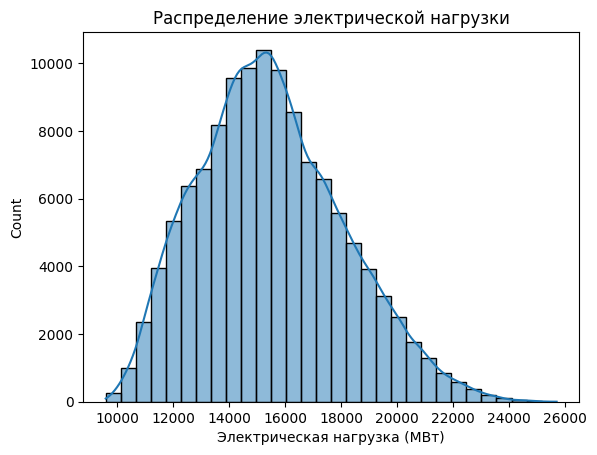

In [29]:
# 3. Визуализация данных
# Гистограммы
sns.histplot(dataset_electrical_load['AEP_MW'], kde=True, bins=30)
plt.xlabel('Электрическая нагрузка (МВт)')
plt.title('Распределение электрической нагрузки')
plt.show()

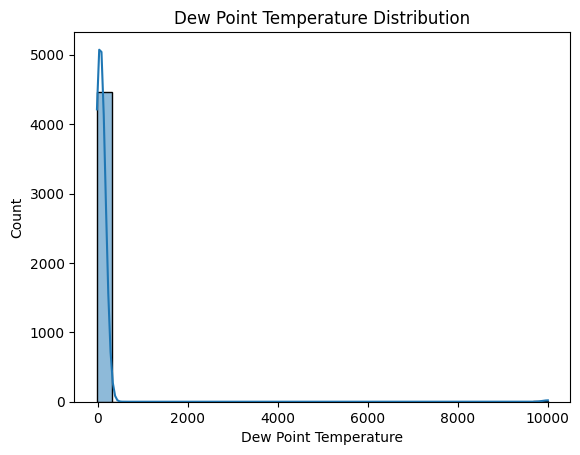

In [13]:
sns.histplot(dataset_air_temperature['DEWP'], kde=True, bins=30)
plt.xlabel('Dew Point Temperature')
plt.title('Dew Point Temperature Distribution')
plt.show()

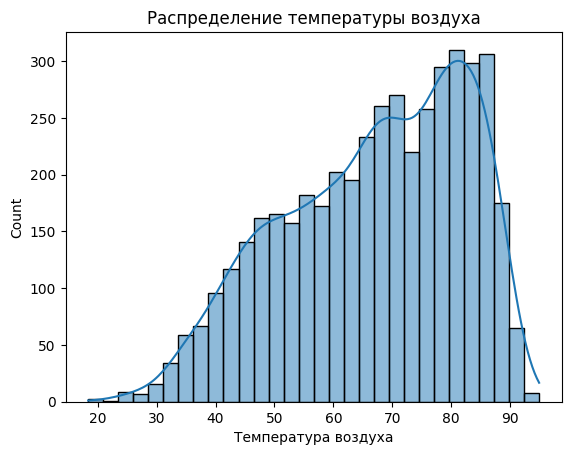

In [30]:
sns.histplot(dataset_air_temperature['TEMP'], kde=True, bins=30)
plt.xlabel('Температура воздуха')
plt.title('Распределение температуры воздуха')
plt.show()

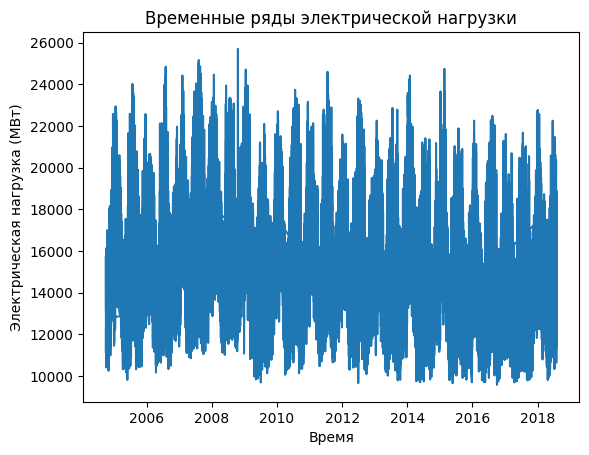

In [23]:
# Временные ряды
fig, ax1 = plt.subplots()
ax1.plot(dataset_electrical_load['Datetime'], dataset_electrical_load['AEP_MW'])
ax1.set_xlabel('Время')
ax1.set_ylabel('Электрическая нагрузка (МВт)')
ax1.set_title('Временные ряды электрической нагрузки')
plt.show()

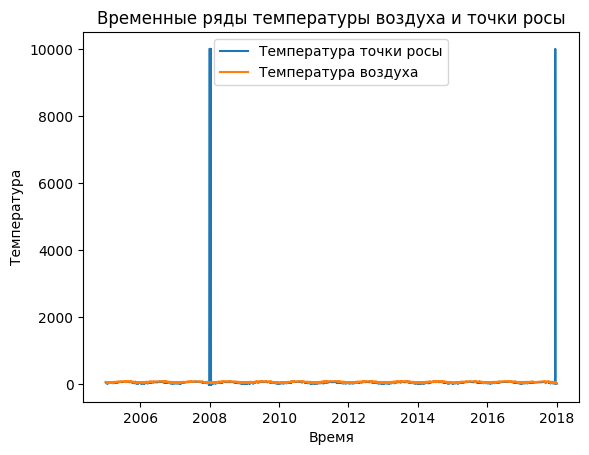

In [21]:
fig, ax2 = plt.subplots()
ax2.plot(dataset_air_temperature['DATE'], dataset_air_temperature['DEWP'], label='Температура точки росы')
ax2.plot(dataset_air_temperature['DATE'], dataset_air_temperature['TEMP'], label='Температура воздуха')
ax2.set_xlabel('Время')
ax2.set_ylabel('Температура')
ax2.legend()
ax2.set_title('Временные ряды температуры воздуха и точки росы')
plt.show()

In [17]:
# Выравнивание датасетов по времени
merged_data = pd.merge(dataset_electrical_load, dataset_air_temperature, left_on='Datetime', right_on='DATE', how='inner')
merged_data = merged_data.drop(columns=['DATE'])

In [18]:
# Построение матрицы корреляции
corr_matrix = merged_data.corr()

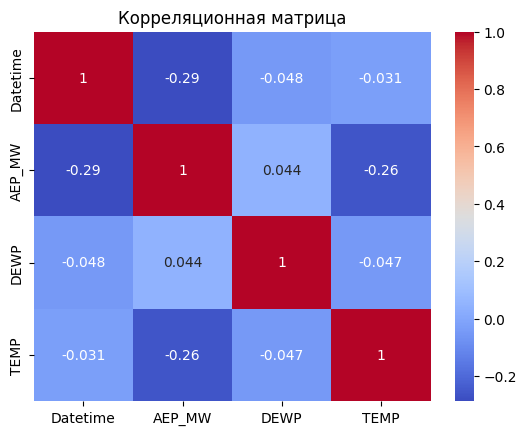

In [22]:
# Визуализация матрицы корреляции
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [25]:
# Агрегация данных по месяцам и вычисление средних значений
dataset_electrical_load['Month'] = pd.to_datetime(dataset_electrical_load['Datetime']).dt.to_period('M')
monthly_mean_load = dataset_electrical_load.groupby('Month')['AEP_MW'].mean()

dataset_air_temperature['Month'] = pd.to_datetime(dataset_air_temperature['DATE']).dt.to_period('M')
monthly_mean_temp = dataset_air_temperature.groupby('Month')[['DEWP', 'TEMP']].mean()

In [26]:
# Вывод информации о среднемесячных значениях
print("Средняя месячная электрическая нагрузка:")
print(monthly_mean_load)

Средняя месячная электрическая нагрузка:
Month
2004-10    13947.537736
2004-11    14830.440278
2004-12    16737.720430
2005-01    17117.088710
2005-02    16496.644345
               ...     
2018-04    13639.244444
2018-05    14117.005376
2018-06    15305.250000
2018-07    15926.622312
2018-08    15406.959184
Freq: M, Name: AEP_MW, Length: 167, dtype: float64


In [27]:
print("\nСредняя месячная температура и точка росы:")
print(monthly_mean_temp)


Средняя месячная температура и точка росы:
               DEWP       TEMP
Month                         
2005-01   42.983871  51.690323
2005-02   45.028571  52.735714
2005-03   44.067742  57.816129
2005-04   50.183333  66.170000
2005-05   61.851613  72.838710
...             ...        ...
2017-09   61.850000  77.136667
2017-10   51.051613  67.061290
2017-11   50.123333  61.440000
2017-12  358.080645  47.854839
2018-01   14.100000  22.500000

[154 rows x 2 columns]


In [28]:
# Объединение датасетов по дате
merged_data = pd.merge(dataset_electrical_load, dataset_air_temperature, left_on='Datetime', right_on='DATE')

# Расчет корреляционной матрицы
correlation_matrix = merged_data[['AEP_MW', 'DEWP', 'TEMP']].corr()

# Вывод корреляции в текстовом виде
print("Корреляция между потреблением электроэнергии и температурой:", correlation_matrix.loc['AEP_MW', 'TEMP'])
print("Корреляция между потреблением электроэнергии и точкой росы:", correlation_matrix.loc['AEP_MW', 'DEWP'])


Корреляция между потреблением электроэнергии и температурой: -0.25847214282231235
Корреляция между потреблением электроэнергии и точкой росы: 0.04391626460916912
